In [1]:
from glob import glob
from pprint import pprint
from random import sample

import matplotlib.pyplot as plt
from numpy import mean

import texte

In [2]:
# with open("LGERM.json", encoding="utf-8") as f:
#     LGERM = json.load(f)
# mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/*/*.xml"

files = glob(path)

print(len(files))

3065


texte.corpora(path)

Distribution mots outils

OCR performance prediction using cross-OCR
alignment
Ahmed BEN SALAH*, Jean philippe MOREUXt
, Nicolas RAGOT+ and Thierry PAQUET§

https://dl.acm.org/doi/pdf/10.1145/2595188.2595221


sample_mode = False

if sample_mode:
    files = sample(files, 200)
#     collection_textes = [texte.Texte(file) for file in tqdm(files)]
# else:
collection_textes = [e for e in texte.corpora(files) if e.plain]


collection_textes[0].texte

In [3]:
import pickle

with open("collection_textes.pickle", mode="rb") as f:
    collection_textes = pickle.load(f)
import texte


In [4]:
counter_lexiques = {l : 0 for l in texte.Texte.lexique}
for txt in collection_textes:
    try:
        counter_lexiques[txt.langue] += 1
    except KeyError:
        print(f"{txt.path} : {txt.langue}")
        counter_lexiques[txt.langue] = 1


counter_lexiques

{'ducange': 0, 'LGERM': 2559, 'tlfi': 505, 'morphalou': 0, 'glaff': 0}

In [5]:
ratio_lexiques = {k: (v/len(files))*100 for k, v in counter_lexiques.items()}
ratio_lexiques

{'ducange': 0.0,
 'LGERM': 83.4910277324633,
 'tlfi': 16.476345840130506,
 'morphalou': 0.0,
 'glaff': 0.0}

In [6]:
[(e, len(v)) for e, v in texte.Texte.lexique.items()]

[('ducange', 103083),
 ('LGERM', 2765324),
 ('tlfi', 365737),
 ('morphalou', 740830),
 ('glaff', 1082688)]

In [7]:
texte.Texte.lexique["ducange"]

{'bacchinon',
 'tonarius',
 'inpenare',
 'creditus',
 'incanus',
 'ligiantia',
 'sabulo',
 'drapale',
 'woytiech',
 'capellarii',
 'cuniculus',
 'expava',
 'cornomannia',
 'mascia',
 'furswirotos',
 'literatoria ars',
 'parda',
 'respersus appellatione',
 'rumare',
 'estapula',
 'alboratus',
 'dispergatio',
 'inthronizare mensam',
 'exultare horam',
 'tymiamaterium',
 'jangularia',
 'leges tauri',
 'touallia',
 'silatum',
 'callengia',
 'attemptare',
 'laicatus',
 'noviomium palatium',
 'auxilium pro velanda filia',
 'cabelloti',
 'glaga',
 'mutarius',
 'saomerius',
 'obolatus',
 'saxire',
 'stammia',
 'jejunium kalendarum januarium',
 'hora signi',
 'brodaria',
 'raspantes',
 'heredium',
 'salinator',
 'coriosus',
 'magister operis',
 'batistorium',
 'amerciare',
 'bissinare',
 'lectus ferreus',
 'pascha novum',
 'alpherare',
 'rector mercatorum',
 'monachus miles',
 'pacata',
 'infangenetheof',
 'cors',
 'tenantia',
 'herestrete',
 'çapatus',
 'carrabilis via',
 'parlamentum tornacen

In [8]:
lex_moyenne = {l : 0 for l in texte.Texte.lexique}
print(lex_moyenne)

for t in collection_textes:
    for k, v in t.dict_lexicalite.items():
        lex_moyenne[k] += v

lex_moyenne = {k: v/len(collection_textes) for k, v in lex_moyenne.items()}
lex_moyenne

{'ducange': 0, 'LGERM': 0, 'tlfi': 0, 'morphalou': 0, 'glaff': 0}


{'ducange': 0.21910537792769474,
 'LGERM': 0.7263048369822236,
 'tlfi': 0.7142876652622757,
 'morphalou': 0.6029308025137243,
 'glaff': 0.5880163448916449}

In [9]:
lst_morpahlou = [txt for txt in collection_textes if txt.langue == "morphalou"]
for e in lst_morpahlou:
    m, o = sorted(e.dict_lexicalite.items(), key=lambda x: x[1], reverse=True)[:2]
    print(m[1] - o[1])

In [10]:
import json

lst = [[files[i], e.header, e.texte] for i, e in enumerate(collection_textes)]

with open("headers.json", "w") as f:
    json.dump(lst, f, indent=4, ensure_ascii=False)

In [11]:
import pandas as pd

df0 = pd.DataFrame(txt.header for txt in collection_textes)
df = pd.DataFrame(
    ((txt.path.name, txt.n_pages, txt.hapax_ratio, txt.ttr, txt.lexicalite) for txt in collection_textes),
    columns = ["fichier", "n_pages", "hapax_ratio", "ttr", "lexicalite"]
)
concat = pd.concat([df, df0], axis=1)

In [12]:
concat.drop("titre", axis=1).to_csv("stats.csv", sep=";")

In [13]:
concat

,fichier,n_pages,hapax_ratio,ttr,lexicalite,form,genre,subject,handwritten_note,table_of_content,...,langue,fichier,path,json_path,langue_detectee,lexicalites,lexicalite,ecarts,ecart,subgenre
0,Moreau100_GALL.xml,7,0.672598,0.827138,0.794186,vers,"[poésie, burlesque, satirique]","Conti, Armand de Bourbon, prince de, 1629-1666",False,False,...,fra,Moreau100_GALL.xml,Corpus/Mazarinades/1-100/Moreau100_GALL.xml,Corpus/Mazarinades_jsons/1-100/Moreau100_GALL....,LGERM,"[0.8461538461538461, 0.744, 0.8372093023255814...",0.794186,"[-0.10215384615384615, 0.09320930232558144, -0...",0.051796,NaN
1,Moreau13_GALL.xml,6,0.651292,0.839272,0.776614,vers,"[pamphlet, satirique]",Scarron,False,False,...,fra,Moreau13_GALL.xml,Corpus/Mazarinades/1-100/Moreau13_GALL.xml,Corpus/Mazarinades_jsons/1-100/Moreau13_GALL.json,LGERM,"[0.9166666666666666, 0.7777777777777778, 0.743...",0.776614,"[-0.13888888888888884, -0.03418803418803418, 0...",0.064072,NaN
2,Moreau14_GBOOKS.xml,7,0.594727,0.744542,0.778306,prose,nouvelles,"[Beaufort, François de Bourbon-Vendôme, duc de...",False,False,...,fra,Moreau14_GBOOKS.xml,Corpus/Mazarinades/1-100/Moreau14_GBOOKS.xml,Corpus/Mazarinades_jsons/1-100/Moreau14_GBOOKS...,LGERM,"[0.7959183673469388, 0.8357142857142857, 0.809...",0.778306,"[0.03979591836734697, -0.02619047619047621, -0...",0.030460,NaN
3,Moreau17_GBOOKS.xml,7,0.735915,0.818866,0.576027,"[vers, prose]",NaN,NaN,False,False,...,fra,Moreau17_GBOOKS.xml,Corpus/Mazarinades/1-100/Moreau17_GBOOKS.xml,Corpus/Mazarinades_jsons/1-100/Moreau17_GBOOKS...,tlfi,"[0.8888888888888888, 0.5950920245398773, 0.592...",0.576027,"[-0.29379686434901153, -0.002606475406929376, ...",0.104070,NaN
4,Moreau18_GBOOKS.xml,7,0.689531,0.799349,0.652778,prose,articles,NaN,False,False,...,fra,Moreau18_GBOOKS.xml,Corpus/Mazarinades/1-100/Moreau18_GBOOKS.xml,Corpus/Mazarinades_jsons/1-100/Moreau18_GBOOKS...,tlfi,"[0.6923076923076923, 0.5, 0.5363128491620112, ...",0.652778,"[-0.1923076923076923, 0.03631284916201116, 0.1...",0.085261,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,Socard85_GALL.xml,6,0.718254,0.823216,0.771698,vers,pamphlet,Scarron,False,False,...,fra,Socard85_GALL.xml,Corpus/Mazarinades/Socard/Socard85_GALL.xml,Corpus/Mazarinades_jsons/Socard/Socard85_GALL....,LGERM,"[0.8217054263565892, 0.7874015748031497, 0.708...",0.771698,"[-0.03430385155343951, -0.07874015748031504, -...",0.091184,NaN
3060,Socard86_GBOOKS.xml,15,0.603645,0.712455,0.702983,prose,"[rhétorique délibérative, remontrances]",None,False,False,...,fra,Socard86_GBOOKS.xml,Corpus/Mazarinades/Socard/Socard86_GBOOKS.xml,Corpus/Mazarinades_jsons/Socard/Socard86_GBOOK...,LGERM,"[0.8220338983050848, 0.7006369426751592, 0.681...",0.702983,"[-0.12139695562992558, -0.01947752238530409, -...",0.088144,NaN
3061,Socard87_GBOOKS.xml,12,0.604119,0.723342,0.712570,prose,"[didactique, sermon]",None,False,False,...,fra,Socard87_GBOOKS.xml,Corpus/Mazarinades/Socard/Socard87_GBOOKS.xml,Corpus/Mazarinades_jsons/Socard/Socard87_GBOOK...,LGERM,"[0.8372093023255814, 0.6891891891891891, 0.774...",0.712570,"[-0.1480201131363923, 0.08500435919790761, -0....",0.101048,NaN
3062,Socard93_GBOOKS.xml,12,0.597287,0.706080,0.755894,prose,"[nouvelles, récit, discours adressé]",Emprisonnement des\n Princes,False,False,...,fra,Socard93_GBOOKS.xml,Corpus/Mazarinades/Socard/Socard93_GBOOKS.xml,Corpus/Mazarinades_jsons/Socard/Socard93_GBOOK...,tlfi,"[0.8169934640522876, 0.7644444444444445, 0.785...",0.755894,"[-0.052549019607843084, 0.02098065677013039, -...",0.041618,NaN


In [14]:
concat.to_csv("stats.csv", sep=";")


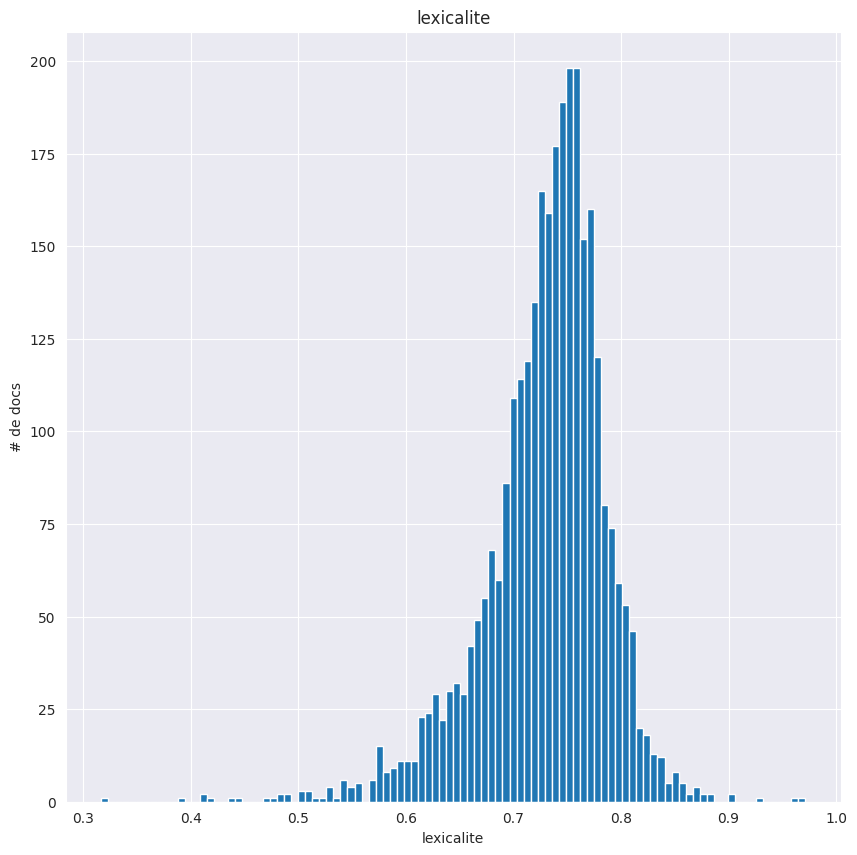

In [52]:
data = [txt.lexicalite for txt in collection_textes]
plt.figure(figsize=(10, 10))
plt.title("lexicalite")
plt.xlabel("lexicalite")
plt.ylabel("# de docs")
plt.xscale('linear')
plt.hist(data, bins=100)
plt.savefig("lexicalite_count.png")
plt.show()

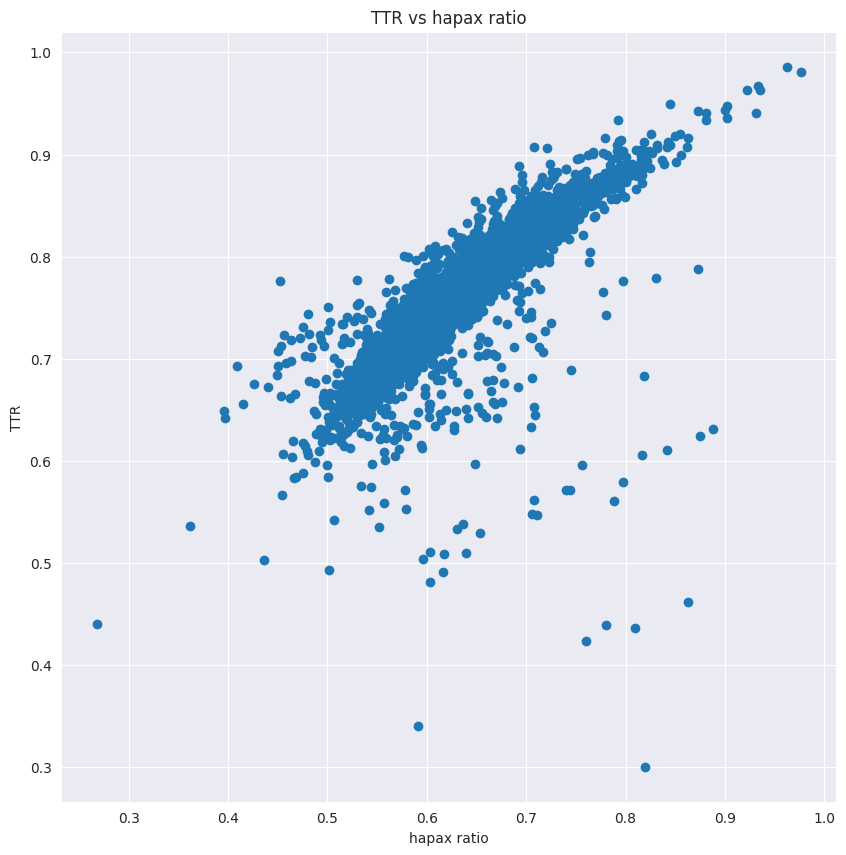

In [15]:
#tup = [(val["hapax_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.hapax_ratio, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs hapax ratio")
plt.xlabel("hapax ratio")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

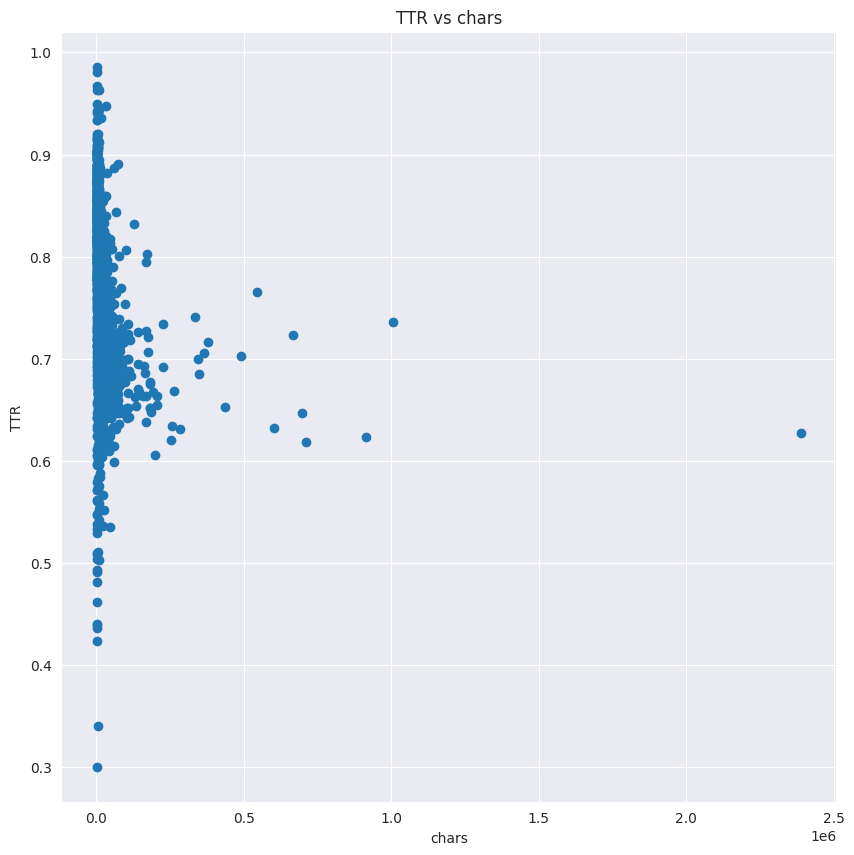

In [16]:
# tup = [(val["chars"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.n_chars, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs chars")
plt.xlabel("chars")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [17]:
x = [txt.n_pages for txt in collection_textes]
print(mean(x))

13.163838120104439


In [18]:
mean([len(txt.texte) for txt in collection_textes])

13.163838120104439

In [19]:
x = [len(txt.plain) for txt in collection_textes]
print(mean(x))

18943.10737597911


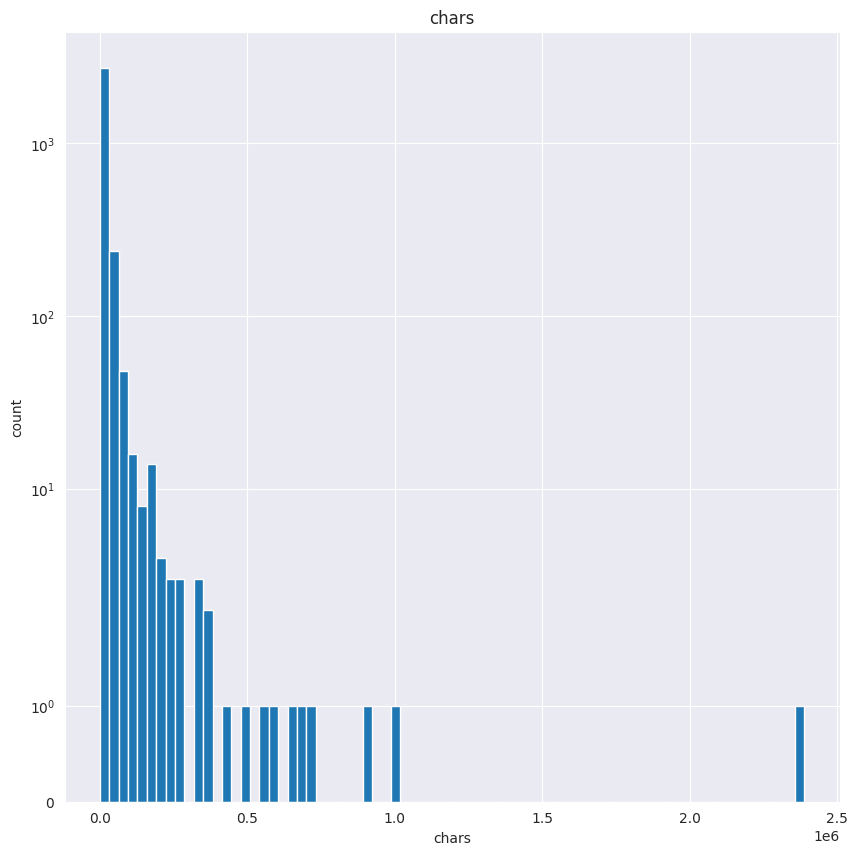

18492.011749347257


In [20]:
# x = [v["chars"] for v in dict_stats.values()]
x = [txt.n_chars if txt.n_chars else 0 for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("chars")
plt.xlabel("chars")
plt.ylabel("count")
plt.xscale('linear')
plt.yscale('symlog', linscale=1)
plt.hist(x, bins=75)

plt.show()

print(mean(x))

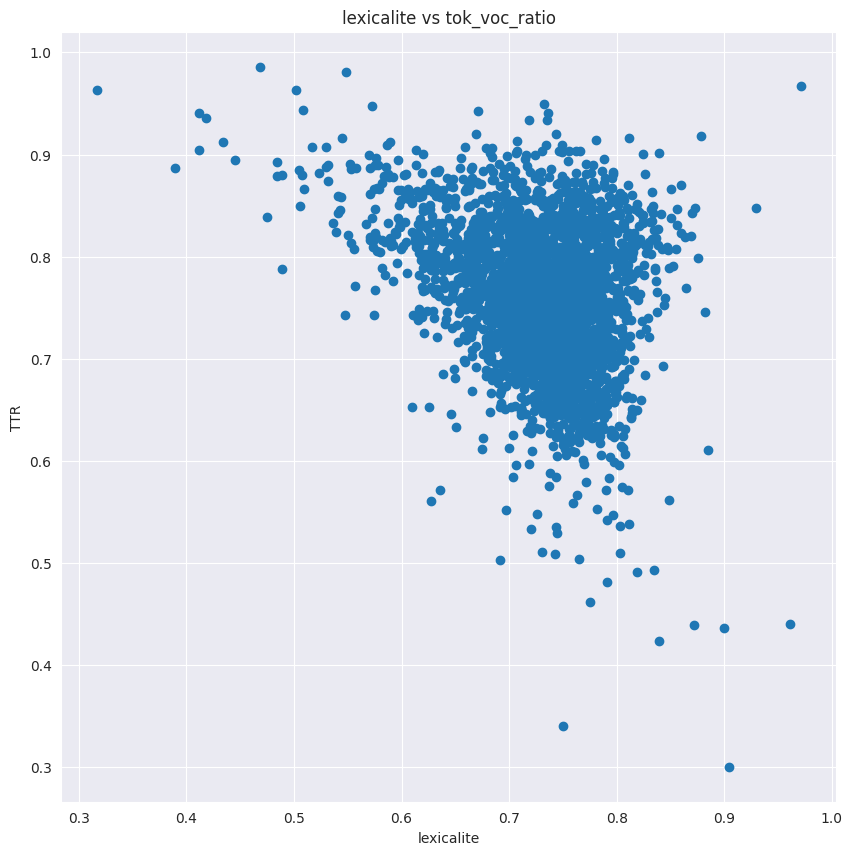

In [21]:
# tup = [(val["tok_voc_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.lexicalite, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("lexicalite vs tok_voc_ratio")
plt.xlabel("lexicalite")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [22]:
x = [txt.header["change"]["@status"] if isinstance(txt.header["change"], dict) else txt.header["change"][0]["@status"]
for txt in collection_textes]
len(x) / len([e for e in x if e == "corrected"])

1.0

In [23]:
for txt in collection_textes:
    pprint(txt.header)
    break

{'change': {'@status': 'corrected', '@when': '2022-09-06', '@who': 'AB'},
 'creation': '1650-01-18',
 'dates': [{'#text': '16 février 2021',
            '@type': 'file_creation',
            '@when': '2021-02-16'},
           {'#text': '23 avril 2021',
            '@type': 'correction',
            '@when': '2021-04-23'}],
 'ecart': 0.05179626316835619,
 'ecarts': [-0.10215384615384615,
            0.09320930232558144,
            -0.06797853309481217,
            0.016483516483516425,
            0.02718894009216588,
            0.0037634408602150726],
 'fichier': 'Moreau100_GALL.xml',
 'form': 'vers',
 'genre': ['poésie', 'burlesque', 'satirique'],
 'handwritten_note': False,
 'illustration': False,
 'json_path': 'Corpus/Mazarinades_jsons/1-100/Moreau100_GALL.json',
 'langue': 'fra',
 'langue_detectee': 'LGERM',
 'lexicalite': 0.7941860465116279,
 'lexicalites': [0.8461538461538461,
                 0.744,
                 0.8372093023255814,
                 0.7692307692307693,
    

In [24]:
txt.ttr, txt.lexicalite

(0.8271376534773252, 0.7941860465116279)

In [25]:
def stats(key):
    stats = {}
    for txt in collection_textes:
        type_ = txt.header["form"] if isinstance(txt.header["form"], str) else tuple(txt.header["form"])

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, key))

    # for k in stats:
    #     v = stats[k]
    #     v = [e for e in v if e]
    #     print(f"{k}: {mean(v):.3f}")
    #     stats[k] = v

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {key}")
    plt.xlabel("type")
    plt.ylabel(f"mean {key}")

    plt.bar(*zip(*plot))

    plt.show()

vers: 0.813
prose: 0.745
('vers', 'prose'): 0.755
('prose', 'manifeste'): 0.712
('prose', 'récit'): 0.788


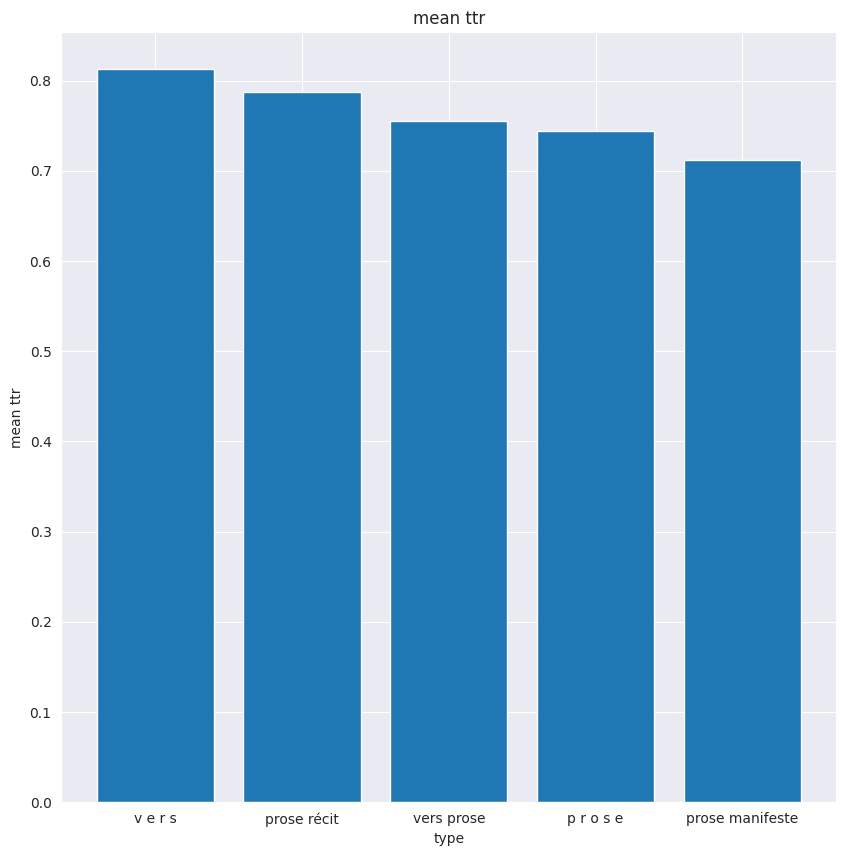

In [26]:
stats("ttr")


vers: 0.684
prose: 0.622
('vers', 'prose'): 0.627
('prose', 'manifeste'): 0.579
('prose', 'récit'): 0.621


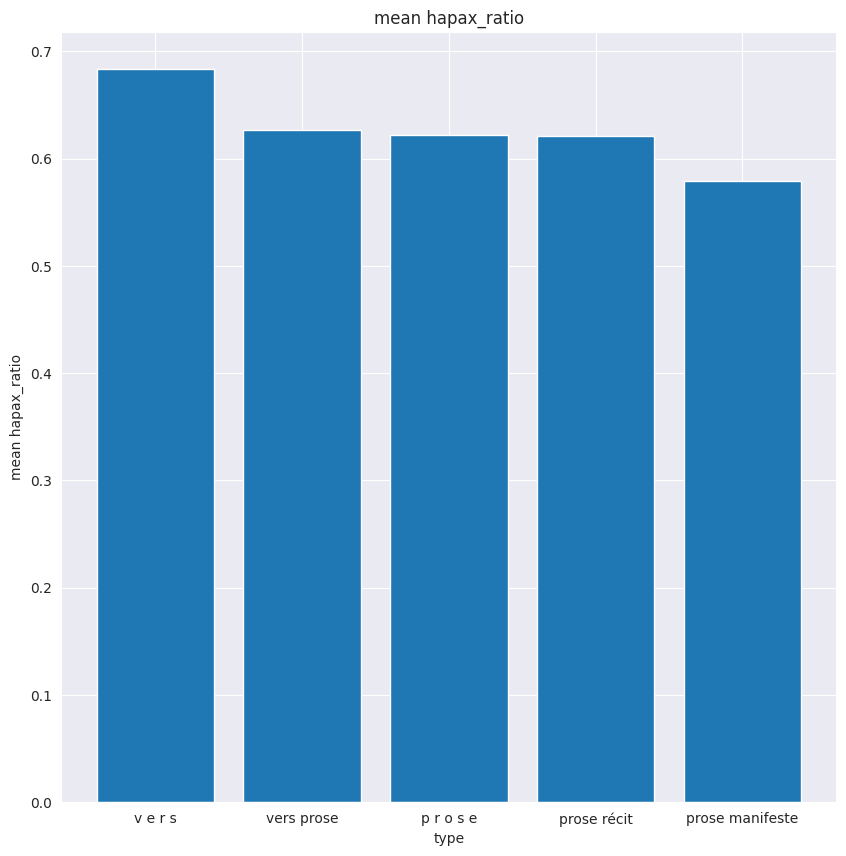

In [27]:
stats("hapax_ratio")

In [28]:
def stats2(header_prop, stats_prop):
    stats = {}
    for txt in collection_textes:
        if header_prop not in txt.header:
            continue

        type_ = txt.header[header_prop]

        if isinstance(type_, bool):
            type_ = str(type_)

        if not isinstance(type_, str):
            type_ = tuple(type_)

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, stats_prop))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {stats_prop}")
    plt.xlabel(f"{header_prop}")
    plt.ylabel(f"mean {stats_prop}")

    plt.bar(*zip(*plot))

    plt.show()


1650-01-18: 0.645
1652-07-30: 0.629
1649-03-30: 0.633
1652-01-01: 0.632
1650-09-02: 0.629
1649-06-26: 0.635
1649-08-18: 0.636
1652-08-19: 0.623
1652-03-05: 0.623
1650-03-05: 0.664
1649-02-08: 0.627
1648-04: 0.616
1650-10-01: 0.636
00-00-0000: 0.645
1649-04-16: 0.665
1652-02-27: 0.635
1651-04-05: 0.590
1652-08-07: 0.626
1649-09-05: 0.653
1652-04-20: 0.631
1649-03-15: 0.632
1651-04-18: 0.599
1652-04-07: 0.643
1650-05-09: 0.592
1649-03-22: 0.631
1651-07-06: 0.620
1652-09-24: 0.628
1649-12-11: 0.646
1652-08-26: 0.621
1650-07-04: 0.626
1651-08-17: 0.607
1651-09-13: 0.593
1651-09-07: 0.614
1652-08-23: 0.664
1652-04-28: 0.611
1651-12-12: 0.646
1649-07-17: 0.638


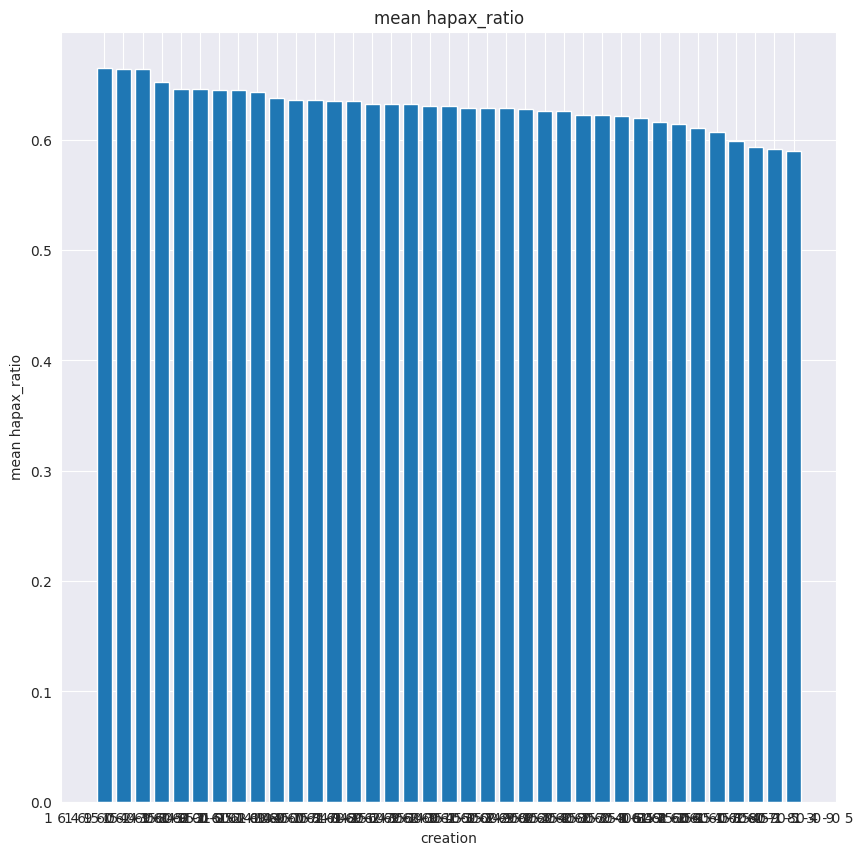

In [29]:
stats2("creation", "hapax_ratio")

1650-01-18: 0.781
1652-07-30: 0.755
1649-03-30: 0.766
1652-01-01: 0.757
1650-09-02: 0.749
1649-06-26: 0.760
1649-08-18: 0.766
1652-08-19: 0.755
1652-03-05: 0.744
1650-03-05: 0.788
1649-02-08: 0.757
1648-04: 0.740
1650-10-01: 0.761
00-00-0000: 0.782
1649-04-16: 0.789
1652-02-27: 0.758
1651-04-05: 0.717
1652-08-07: 0.741
1649-09-05: 0.773
1652-04-20: 0.757
1649-03-15: 0.744
1651-04-18: 0.714
1652-04-07: 0.765
1650-05-09: 0.714
1649-03-22: 0.755
1651-07-06: 0.748
1652-09-24: 0.757
1649-12-11: 0.766
1652-08-26: 0.745
1650-07-04: 0.762
1651-08-17: 0.732
1651-09-13: 0.723
1651-09-07: 0.740
1652-08-23: 0.780
1652-04-28: 0.734
1651-12-12: 0.792
1649-07-17: 0.759


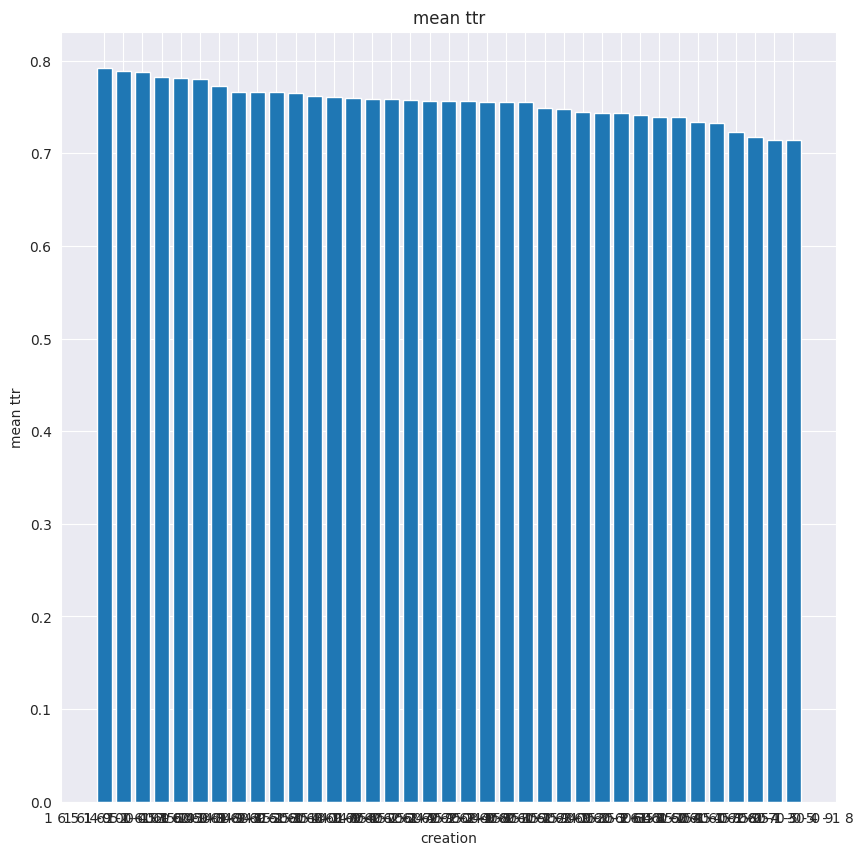

In [30]:
stats2("creation", "ttr")

False: 16639.893
True: 134866.833


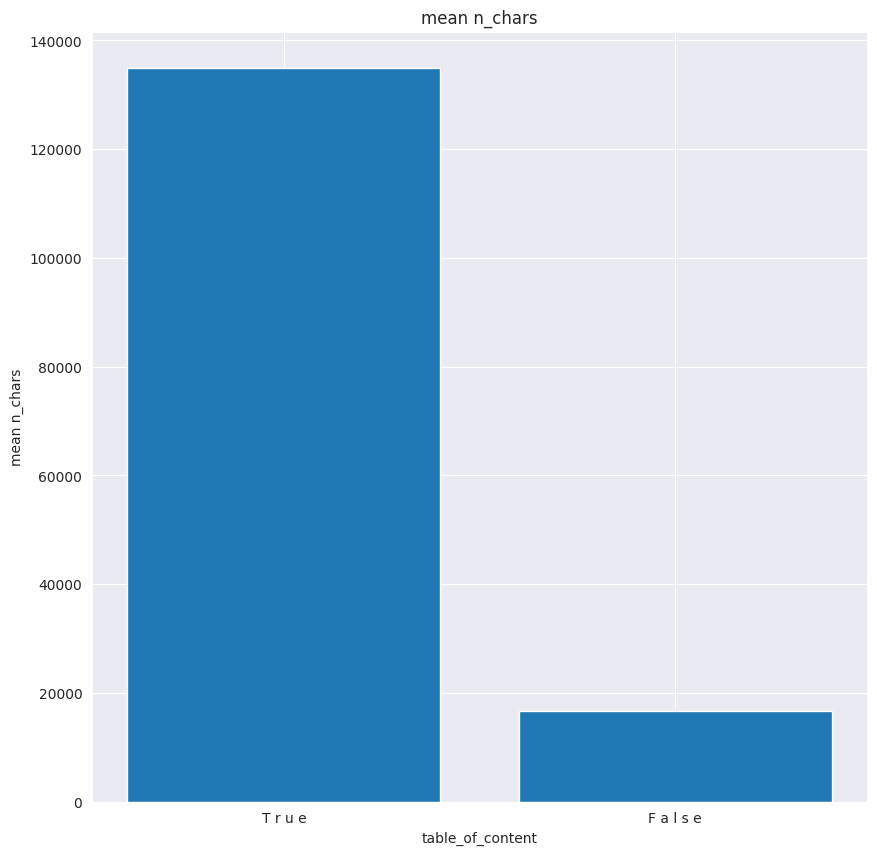

False: 0.759
True: 0.697


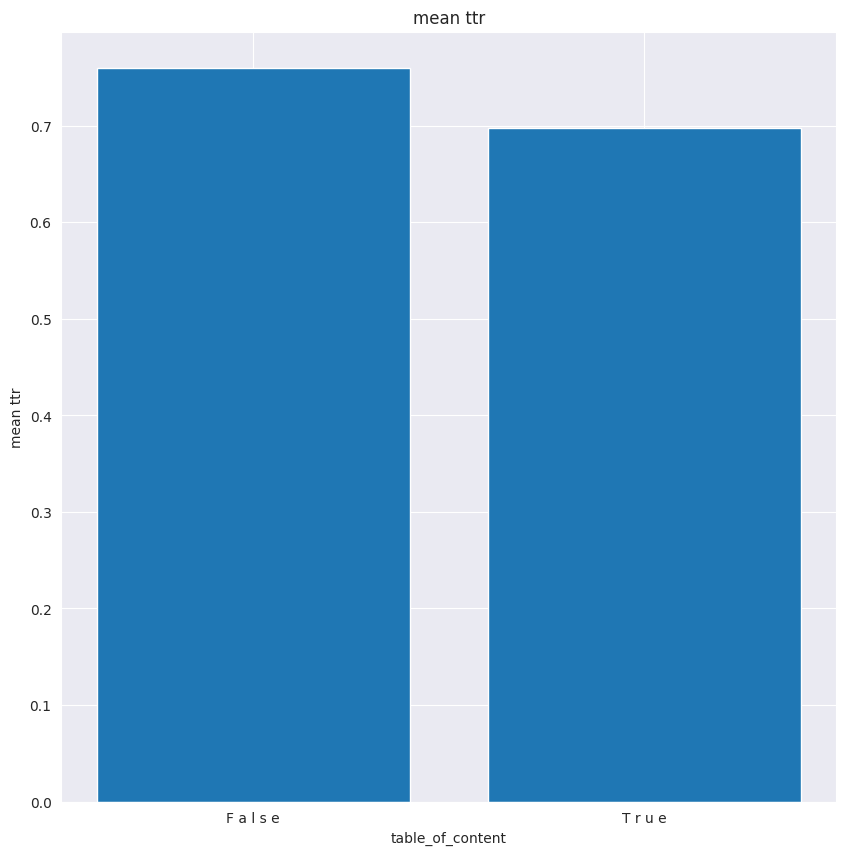

In [31]:
stats2("table_of_content", "n_chars")
stats2("table_of_content", "ttr")

In [32]:
import string

french_chars = {'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'œ', 'ù', 'û', 'ü', 'À', 'Â', 'Ä', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Î',
                'Ï', 'Ô',
                'Œ', 'Ù', 'Û', 'Ü', 'à', 'â', 'ä', 'æ', 'ç'}.union(set(string.printable))

"ſ" in french_chars, "a" in french_chars, "é" in french_chars, ":" in french_chars

(False, True, True, True)

In [33]:
def mot_is_french(mot):
    for char in mot:
        if char not in french_chars:
            return False
    return True

i, j, tot = 0, 0, 0

for txt in collection_textes:
    for page in txt.pages:
        for phrase in page:
            for mot in phrase.split():
                tot += 1
                if mot_is_french(mot):
                    i += 1
                else:
                    j += 1

print(i, j, tot, i / tot, j / tot)




45115113 2810829 47925942 0.9413505737665 0.05864942623350001


In [34]:
ttrlist = [(txt.ttr, i) for i, txt in enumerate(collection_textes) if txt.ttr]
hapaxlist = [(txt.hapax_ratio, i) for i, txt in enumerate(collection_textes) if txt.hapax_ratio]
lexicalitelist = [(txt.lexicalite, i) for i, txt in enumerate(collection_textes) if txt.lexicalite]


In [35]:
ttrlist = sorted(ttrlist, key=lambda x: x[0], reverse=True)
hapaxlist = sorted(hapaxlist, key=lambda x: x[0], reverse=True)
lexicalitelist = sorted(lexicalitelist, key=lambda x: x[0], reverse=True)


In [36]:
print(ttrlist[-1])
collection_textes[ttrlist[-1][1]].header

(0.3005464480874317, 2776)


{'form': 'prose',
 'genre': ['déclaration', 'texte officiel'],
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-03-15',
 'change': {'@status': 'corrected', '@when': '2022-03-10', '@who': 'AB'},
 'titre': 'La déclaration de monseigneur le prince de Conty et de\n          messieurs les généraux, enregistrée en parlement, pour l’exécution de l’arrêt du huitième\n          janvier dernier contre le cardinal Mazarin, pour le soulagement du peuple et la paix\n          générale.',
 'dates': {'@type': 'file_creation',
  '@when': '2022-03-02',
  '#text': '2 mars 2022'},
 'langue': 'fra',
 'fichier': 'Moreau886_MAZ.xml',
 'path': 'Corpus/Mazarinades/801-900/Moreau886_MAZ.xml',
 'json_path': 'Corpus/Mazarinades_jsons/801-900/Moreau886_MAZ.json',
 'langue_detectee': 'LGERM',
 'lexicalites': [0.9054054054054054, 1.0, 1.0],
 'lexicalite': 0.9041095890410958,
 'ecarts': [0.09459459459459463, 0.0],
 'ecart': 0.047297297297297314}

In [37]:
print(ttrlist[0])
collection_textes[ttrlist[0][1]].header

(0.9859603415834419, 458)


{'form': 'vers',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-26',
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Gallicinium nuper auditum, Franciam expilante Mazarino.\n          Quis dedit gallo intelligentiam ? JoB, 38. Qui preparat corvo escam suam. ID.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'lat',
 'fichier': 'Moreau1464_GBOOKS.xml',
 'path': 'Corpus/Mazarinades/1401-1500/Moreau1464_GBOOKS.xml',
 'json_path': 'Corpus/Mazarinades_jsons/1401-1500/Moreau1464_GBOOKS.json',
 'langue_detectee': 'tlfi',
 'lexicalites': [0.71875, 0.45454545454545453, 0.46296296296296297],
 'lexicalite': 0.4686192468619247,
 'ecarts': [-0.26420454545454547, 0.008417508417508435],
 'ecart': 0.13631102693602695}

In [38]:
print(hapaxlist[-1])
collection_textes[hapaxlist[-1][1]].header


(0.26749611197511663, 1557)


{'form': 'vers',
 'subject': 'Condé, Louis de Bourbon, prince de, 1621-1686',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-06-22', '@who': 'AB'},
 'titre': 'Les propriétés diaboliques D. C.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau2923_GALL.xml',
 'path': 'Corpus/Mazarinades/2901-3000/Moreau2923_GALL.xml',
 'json_path': 'Corpus/Mazarinades_jsons/2901-3000/Moreau2923_GALL.json',
 'langue_detectee': 'LGERM',
 'lexicalites': [0.9230769230769231,
  0.9444444444444444,
  0.9825581395348837,
  0.9642857142857143,
  0.9507389162561576,
  0.9710144927536232],
 'lexicalite': 0.9607329842931938,
 'ecarts': [0.02136752136752129,
  0.03811369509043927,
  -0.01827242524916939,
  -0.013546798029556717,
  0.020275576497465586],
 'ecart': 0.02231520324683045}

In [39]:
print(hapaxlist[0])
collection_textes[hapaxlist[0][1]].header


(0.9766763848396501, 136)


{'form': 'vers',
 'genre': 'pamphlet',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-30',
 'change': {'@status': 'corrected', '@when': '2021-11-12', '@who': 'AB'},
 'titre': 'Dirœ in Angliam ob patratum scelus, IX februarii\n          1649.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau1098_GBOOKS.xml',
 'path': 'Corpus/Mazarinades/1001-1100/Moreau1098_GBOOKS.xml',
 'json_path': 'Corpus/Mazarinades_jsons/1001-1100/Moreau1098_GBOOKS.json',
 'langue_detectee': 'tlfi',
 'lexicalites': [0.7105263157894737, 0.5286624203821656, 0.5380434782608695],
 'lexicalite': 0.5478723404255319,
 'ecarts': [-0.18186389540730807, 0.009381057878703913],
 'ecart': 0.095622476643006}

In [40]:
print(lexicalitelist[-1])
collection_textes[lexicalitelist[-1][1]].header


(0.3163265306122449, 2862)


{'form': 'prose',
 'genre': ['avis', 'traduction'],
 'subject': ['Gabriel Naudé', 'Bibliothèque'],
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-03-07', '@who': 'AB'},
 'titre': 'Gabrielis Naudæi Vermahnung an die Parlaments Herrn in\n          Parisz / über die Verkauffung der bibliothec des Herrn Cardinalis Mazarini geschehen am\n          29. Decembris 1652.',
 'dates': {'@type': 'file_creation',
  '@when': '2022-03-02',
  '#text': '2 mars 2022'},
 'langue': 'ger',
 'fichier': 'M15370_MAZ.xml',
 'path': 'Corpus/Mazarinades/Bibliotheque_Mazarine/M15370_MAZ.xml',
 'json_path': 'Corpus/Mazarinades_jsons/Bibliotheque_Mazarine/M15370_MAZ.json',
 'langue_detectee': 'tlfi',
 'lexicalites': [0.7142857142857143,
  0.32098765432098764,
  0.2608695652173913,
  0.24022346368715083,
  0.35185185185185186,
  0.2804878048780488,
  0.4017094017094017],
 'lexicalite': 0.3163265306122449,
 'ecarts': [-0.3932980599647

In [41]:
print(lexicalitelist[0])
collection_textes[lexicalitelist[0][1]].header


(0.9714285714285714, 475)


{'form': 'prose',
 'subject': 'Paris (France)',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Le généreux prince aux Parisiens de mourir pour le\n          service du roi et de ne point souffrir le retour du cardinal Mazarin.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau1483_GBOOKS.xml',
 'path': 'Corpus/Mazarinades/1401-1500/Moreau1483_GBOOKS.xml',
 'json_path': 'Corpus/Mazarinades_jsons/1401-1500/Moreau1483_GBOOKS.json',
 'langue_detectee': 'LGERM',
 'lexicalites': [0.9722222222222222],
 'lexicalite': 0.9714285714285714,
 'ecarts': [],
 'ecart': None}

In [42]:
len(collection_textes)

3064

In [43]:
collection_textes[1876].lexicalite


0.7441657306876326

In [44]:
to_save = [
    (ttrlist[-1][1], "ttr_min"),
    (ttrlist[0][1], "ttr_max"),
    (hapaxlist[-1][1], "hapax_min"),
    (hapaxlist[0][1], "hapax_max"),
    (lexicalitelist[-1][1], "lexicalite_min"),
    (lexicalitelist[0][1], "lexicalite_max"),
]

from pathlib import Path

Path("extremes").mkdir(parents=True, exist_ok=True)

for i, name in to_save:
    txt = collection_textes[i]
    with open(f"extremes/{name}.txt", "w") as f:
        f.write('\n'.join([txt.path.as_posix(), "\n"] + txt.pages))


paragraphes = []
temp = ""
for e in txt.split("\n\n"):
    if len(e) < 10 :
        continue
    temp += e
    if len(temp) > 2000:
        paragraphes.append(temp)
        temp = ""
